In [1]:
from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.dataloader import dataloader

num_scenario = 3
dl = dataloader(scenario= num_scenario, path="/home/adi/cloudy_adlu/smart_hans/AP2/Daten/headpose_opencv_pitch_roll_yaw_20220904", nr_taps=1, move_window_by=-10, feature_list = ["nosetip_y","pitch"])
df_n = dl.df

print(" hhhhhhhh ")

cols = list(df_n.columns)
a, b = cols.index('index'), cols.index('feature')
cols[b], cols[a] = cols[a], cols[b]
df_n = df_n[cols]
print(df_n)
df_n = df_n.sort_values(['feature','target'])#.reset_index(drop=True)

/home/adi/anaconda3/envs/smart_hans/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


smart_hans_07312022_173453_4_131-155_08_mnn_.csv
smart_hans_07312022_171736_10_271-296_08_mnn_.csv
smart_hans_08022022_182936_5_185-215_08_wny_.csv
smart_hans_08022022_211852_10_341-371_08_mky_.csv
smart_hans_07312022_182331_4_149-180_08_wnn_.csv
smart_hans_08022022_190740_9_301-331_08_mny_.csv
smart_hans_07312022_181701_7_243-273_08_wny_.csv
smart_hans_07252022_154619_12_431-469_08_mgy_.csv
smart_hans_08022022_192941_6_217-247_08_wny_.csv
smart_hans_07312022_173105_12_400-431_08_mnn_.csv
smart_hans_07312022_175436_12_339-368_08_mny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_07312022_161925_10_313-339_08_mny_.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_174636_13_433-463_08_wyn_.csv
smart_hans_07252022_154808_9_313-351_08_mny_.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_195007_9_312-344_08_gny_.csv
smart_hans_0802

0      1.0
4      1.0
8      1.0
12     1.0
16     1.0
      ... 
591    2.0
595    2.0
599    2.0
603    2.0
607    2.0
Name: feature, Length: 608, dtype: float64
 hhhhhhhh 
shape ours (608, 43)
our y
[[ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 11.]
 [ 2. 12.]
 [ 1. 

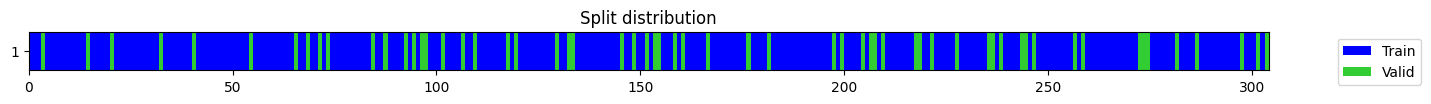

(#304) [(TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 1., 11.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 1., 11.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 1., 11.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 1., 11.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.])), (TSTensor(vars:2, len:40, device=cpu, dtype=torch.float32), tensor([ 2., 12.]))] ...]
torch.Size([64, 2, 40]) torch.Size([64, 2])


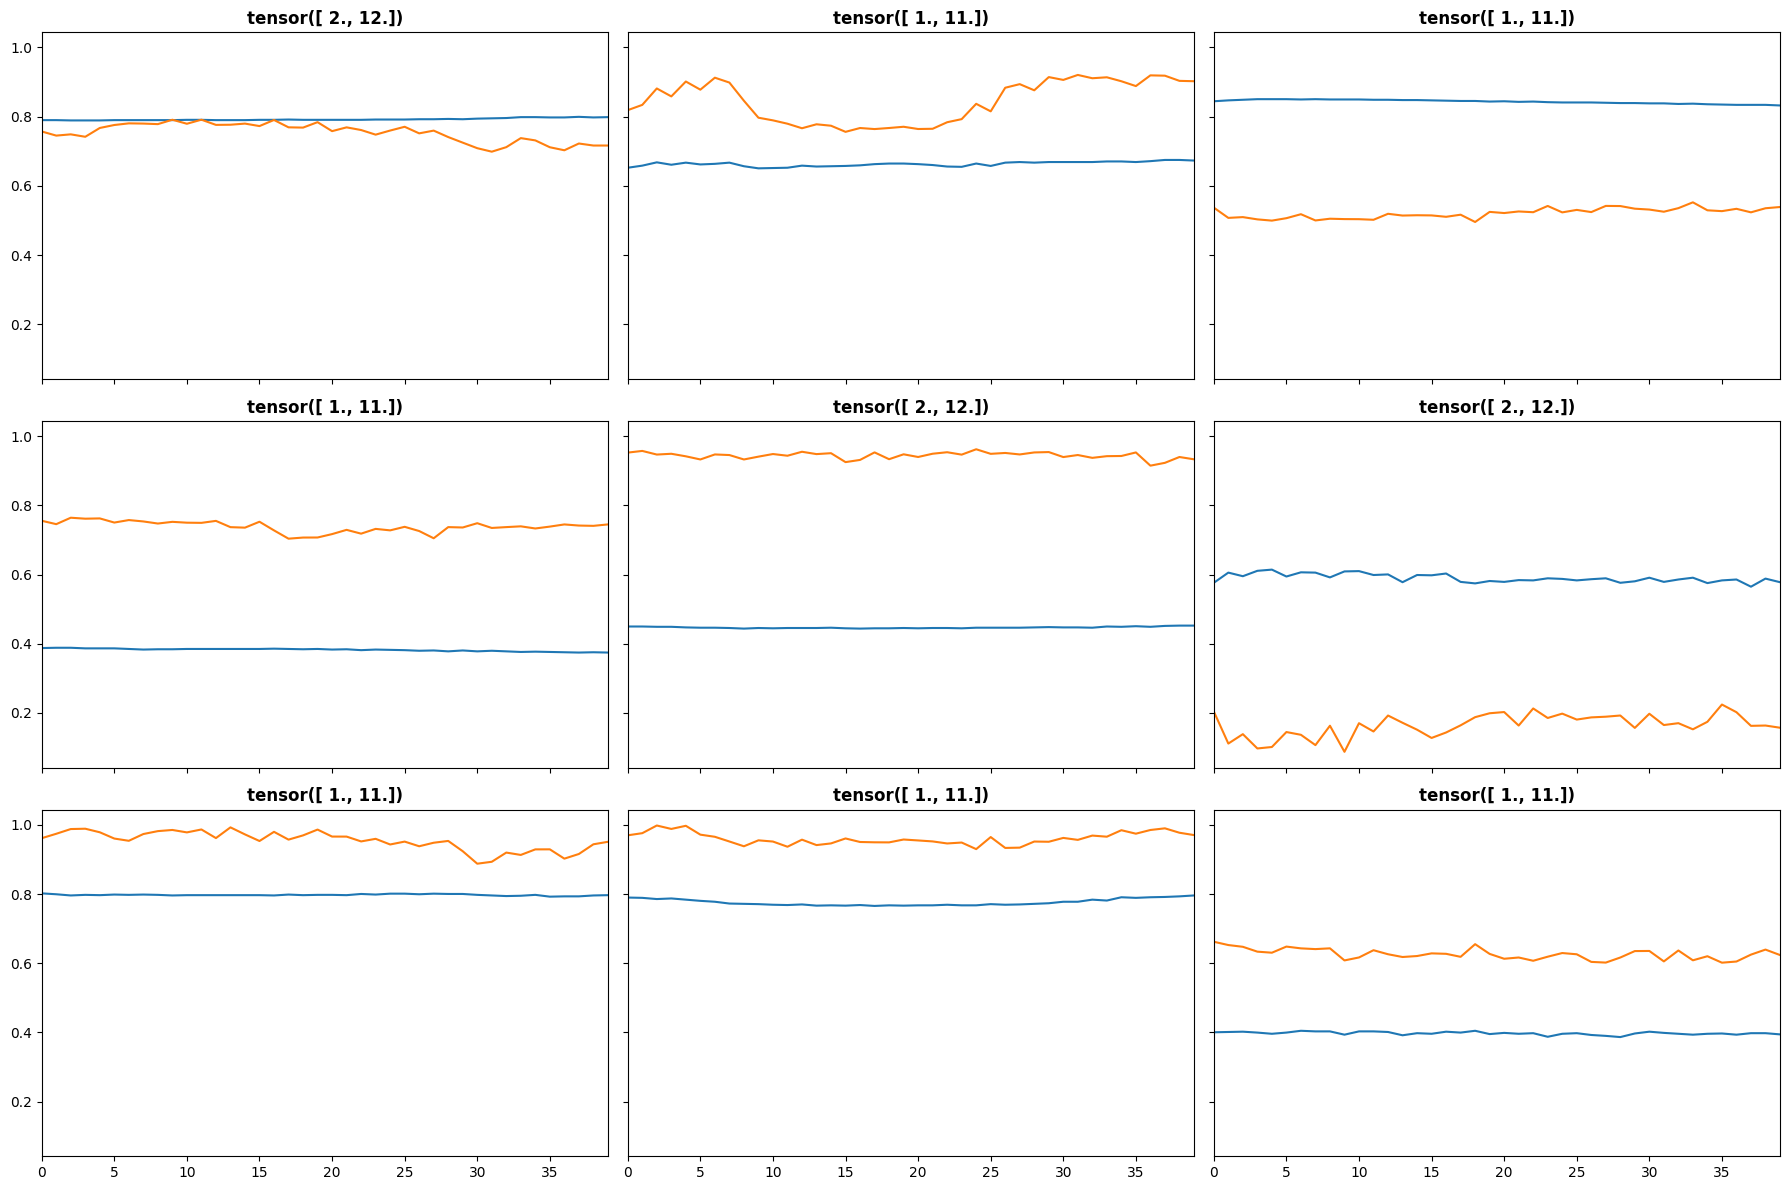

In [3]:
print(df_n["feature"])
print(" hhhhhhhh ")

X, y = df2xy (df_n, sample_col='index', feat_col='feature', target_col='target', data_cols=None)


print(f"shape ours {df_n.shape}")


print("our y")
print(y)

#print(" hhhhhhhh ")
splits = get_splits(y, valid_size=.2)
splits

tfms  = [None, [Categorize()]]
dsets = TSDatasets(X,y, inplace=True, splits=splits)

print(dsets)


dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128],  num_workers=0)
b  = dls.one_batch()
x, y = b
print(x.size(), y.size())
dls.show_batch(sharey=True)



shape ucr (180, 573)
ucr y
[[  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  1.  11. 101.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  2.  12. 102.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  3.  13. 103.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 [  4.  14. 104.]
 

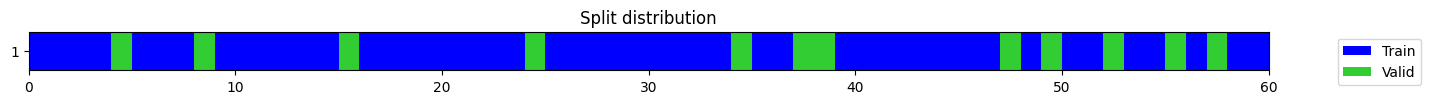

(#60) [(TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([0, 4, 8])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([0, 4, 8])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([0, 4, 8])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([0, 4, 8])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([0, 4, 8])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([1, 5, 9])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([1, 5, 9])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([1, 5, 9])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([1, 5, 9])), (TSTensor(vars:3, len:570, device=cpu, dtype=torch.float32), TensorCategory([1, 5, 9]))] ...]


In [4]:
!CUDA_LAUNCH_BLOCKING=1
ds_name = 'OliveOil'
X_ucr, y_ucr, _ = get_UCR_data(ds_name, return_split=False)
X_ucr = X_ucr[:, 0]
y_ucr = y_ucr.reshape(-1, 1)
data = np.concatenate((X_ucr, y_ucr), axis=-1)
df = pd.DataFrame(data).astype(float)
df = df.rename(columns={570: 'target'})
df1 = pd.concat([df, df + 10, df + 100], axis=0).reset_index(drop=False)
df2 = pd.DataFrame(np.array([1] * 60 + [2] * 60 + [3] * 60), columns=['feature'])
df = pd.merge(df2, df1, left_index=True, right_index=True)
df

X_ucr, y_ucr = df2xy(df, sample_col='index', feat_col='feature', target_col='target', data_cols=None)

print(f"shape ucr {df.shape}")


print("ucr y")
print(y_ucr)

splits_ucr = get_splits(y_ucr, valid_size=.2)
splits_ucr


dsets_ucr = dsets = TSDatasets(X_ucr,y_ucr, tfms=[None, TSClassification()], inplace=True, splits=splits_ucr)

print(dsets_ucr)


dls_ucr = TSDataLoaders.from_dsets(dsets_ucr.train, dsets_ucr.valid, num_workers=0, batch_tfms=[TSStandardize()])


#dls_ucr.show_batch(sharey=True)

In [5]:
b  = dls_ucr.one_batch()
x_ucr_debug, y_ucr_debug = b
print(x_ucr_debug.size(), y_ucr_debug.size())

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [26]:
scenario_name_stage0 = "multivar_scenario_{}_{}_stage0".format(num_scenario, "InceptionTimePlus")
model = InceptionTimePlus(dls.vars, dls.c)
learn = Learner(dls, model)
learn.save(scenario_name_stage0)

Path('models/multivar_scenario_3_InceptionTimePlus_stage0.pth')

In [27]:
learn.load(scenario_name_stage0)
"y not being batched correctly? https://forums.fast.ai/t/input-training-batch-size-error-for-multi-class-classification-with-custom-dataset/85220/2"
learn.lr_find()
print("done")

ValueError: Expected input batch_size (64) to match target batch_size (128).

In [ ]:
scenario_name_stage1 = scenario_name_stage0.replace("0","1")
learn.fit_one_cycle(100, lr_max=1e-3)
learn.save(scenario_name_stage1)

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.show_results()

In [ ]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?

In [ ]:
learn.plot_confusion_matrix()

In [ ]:
learn.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)